# Análise exploratória de dados

## 1. Descrição dos dados

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown, HTML
from matplotlib.colors import LinearSegmentedColormap

#Definindo a paleta de cores
colors= ["#596abe", "#b7521f", "#00865f","#59bead","#bead59","#7b59be"]
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

# 1. Leitura do conjunto de dados

In [2]:
# carrega o dataset 
df = pd.read_csv("../data/raw/penguins.csv")
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
#shape
df.shape

(344, 9)

In [5]:
#Amostra dos dados 
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
# Amostra dos dados 
df.tail()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [7]:
# Colunas do conjunto de dados
df.columns

Index(['Unnamed: 0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [8]:
#Tipo de dados de cada coluna 
df.dtypes

Unnamed: 0             int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [9]:
# Registros duplicados 
df[df.duplicated()]

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


In [10]:
#verificando se há valores ausentes 
df.isnull().sum()

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [11]:
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# 2. Descrição dos dados

**O conjunto de dados Palmer Archipelago (Antarctica) Penguin Data** reúne informações detalhadas sobre três espécies de pinguins encontradas no Arquipélago Palmer, na Antártica. Ele foi coletado pela Dra. Kristen Gorman em colaboração com a Estação Palmer, integrante da Long Term Ecological Research Network (LTER).

Esse dataset inclui características físicas, como o comprimento e profundidade do bico, comprimento da nadadeira e massa corporal, além de dados sobre o sexo e a localização dos pinguins. É amplamente utilizado em análises exploratórias, visualizações de dados e em tarefas de aprendizado de máquina supervisionado, principalmente para classificação, onde a variável-alvo é a espécie dos pinguins, e as demais variáveis servem como preditoras.

Além disso, o conjunto de dados é valorizado por sua simplicidade e clareza, sendo uma excelente ferramenta para introduzir conceitos de ciência de dados e aprendizado de máquina, enquanto também levanta questões relevantes sobre o impacto das mudanças ambientais nos ecossistemas polares.

### 2.1 Dicionário de dados 

In [12]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,species,"Espécie do pinguim (Adelie, Chinstrap, Gentoo)",qualitativa,nominal
1,island,"Ilha onde o pinguim foi encontrado (Biscoe, Dr...",qualitativa,nominal
2,bill_length_mm,Comprimento do bico em milímetros,quantitativa,contínua
3,bill_depth_mm,Profundidade do bico em milímetros,quantitativa,contínua
4,flipper_length_mm,Comprimento da nadadeira em milímetros,quantitativa,contínua
5,body_mass_g,Massa corporal em gramas,quantitativa,contínua
6,sex,Sexo do pinguim (Masculino ou Feminino),qualitativa,nominal
7,year,Ano em que os dados foram coletados,quantitativa,discreta


O dataframe possui ao todo **8** variáveis, sendo elas:
-  **3** Qualitativa nominal
-  **4** Quantitativa contínua
-  **1** Quantitativa discreta 

## 3. Perguntas de partida e hipóteses

 - Quais espécies têm maior massa corporal ?
 - Existe variação entre tamanhos de bico?
 - Qual sexo é mais predominante nas ilhas?


### 3.1 Quais espécies têm maior massa corporal?

In [15]:
df.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [17]:
massa_media= df.groupby('species')['body_mass_g'].mean().reset_index()
print(massa_media)

     species  body_mass_g
0     Adelie  3700.662252
1  Chinstrap  3733.088235
2     Gentoo  5076.016260


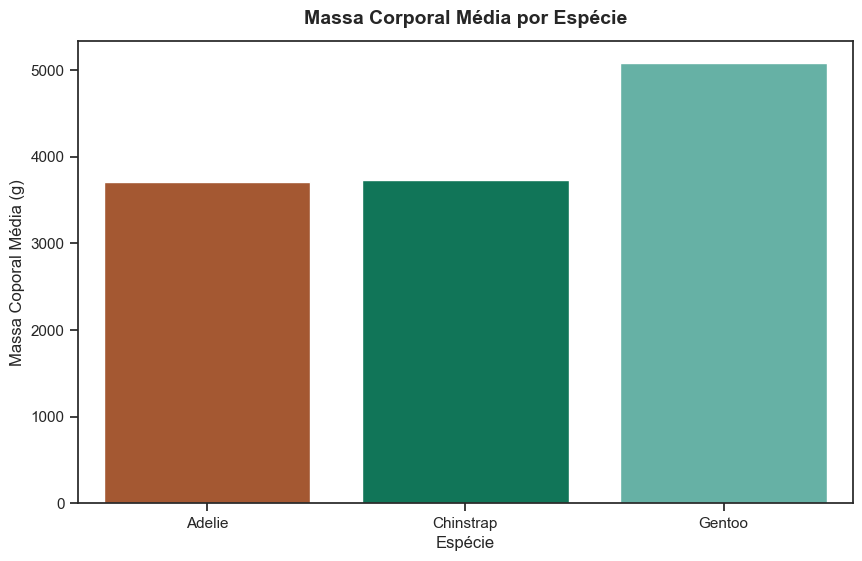

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x='species', y='body_mass_g', data=massa_media, hue='species', palette=["#b7521f","#00865f","#59bead"] )

plt.title('Massa Corporal Média por Espécie',  fontweight='bold', fontsize=14, y=1.02)
plt.xlabel('Espécie')
plt.ylabel('Massa Coporal Média (g)')
plt.xticks(rotation=0)
plt.show()

**Insights:** Conforme Apresentado no gráfico a espécie Gentoo apresenta ter uma massa corporal maior que as espécies Adelie e Chinstrap. 

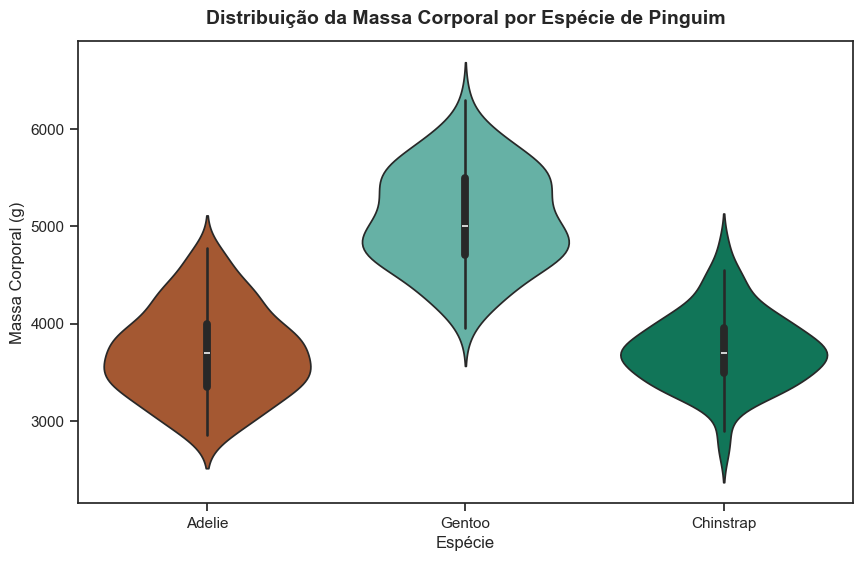

In [28]:
#Criação do gráfico
plt.figure(figsize=(10,6))
sns.violinplot(x='species', y='body_mass_g', data=df, hue='species', palette=["#b7521f","#59bead","#00865f"] )

#Títulos e rótulos
plt.title("Distribuição da Massa Corporal por Espécie de Pinguim", fontweight='bold', fontsize=14, y=1.02)
plt.xlabel("Espécie", fontsize=12)
plt.ylabel("Massa Corporal (g)", fontsize=12)
plt.show()

### 3.2 Qual a relação entre comprimento e profundidade do bico por espécie?

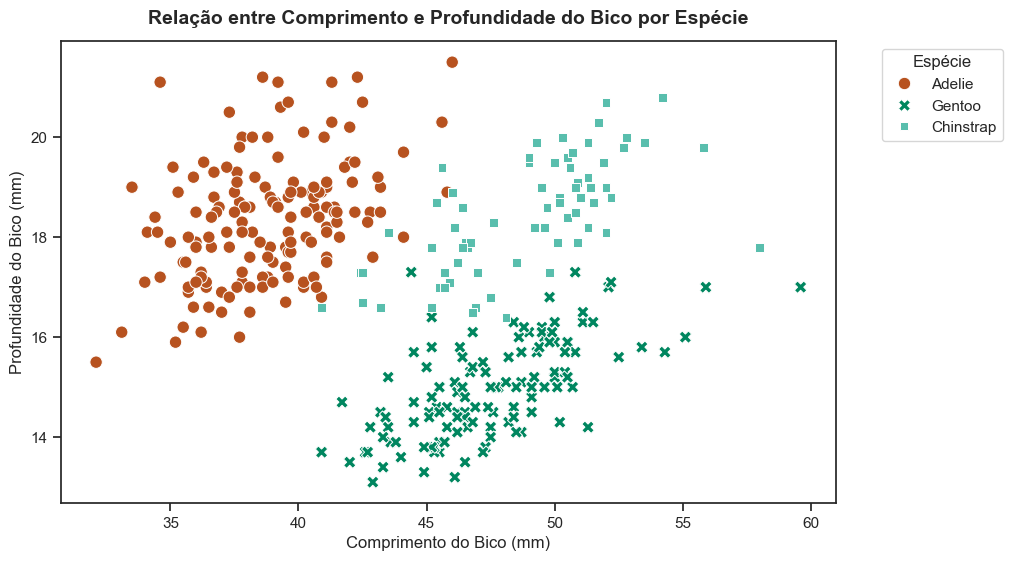

In [50]:
# Criar o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="bill_length_mm", 
    y="bill_depth_mm", 
    hue="species", 
    data=df, 
    palette=["#b7521f","#00865f","#59bead"], 
    style="species", 
    s=80 
)

# Adicionar título
plt.title("Relação entre Comprimento e Profundidade do Bico por Espécie",fontweight='bold', fontsize=14, y=1.02)
plt.xlabel("Comprimento do Bico (mm)", fontsize=12)
plt.ylabel("Profundidade do Bico (mm)", fontsize=12)

# Legenda
plt.legend(title="Espécie", bbox_to_anchor=(1.05,1), loc='upper left')

plt.show()

**Insights:** O gráfico mostra uma separação clara entre as espécies com base nas dimensões do bico.
- A **espécie Gentoo** tende a ter bicos mais longos e menos profundos.
- A **espécie Adelie** apresenta bicos mais curtos e mais profundos.
- A **espécie Chinstrap** é intermediária em ambas as características.

### 3.3 Qual sexo é mais predominante nas ilhas?

In [52]:
contagem_sexo=df.groupby(['island', 'sex']).size().unstack(fill_value=0)
print(contagem_sexo)

sex        female  male
island                 
Biscoe         80    83
Dream          61    62
Torgersen      24    23


In [53]:
predominante_sexo = contagem_sexo.idxmax(axis=1)
print(predominante_sexo)

island
Biscoe         male
Dream          male
Torgersen    female
dtype: object


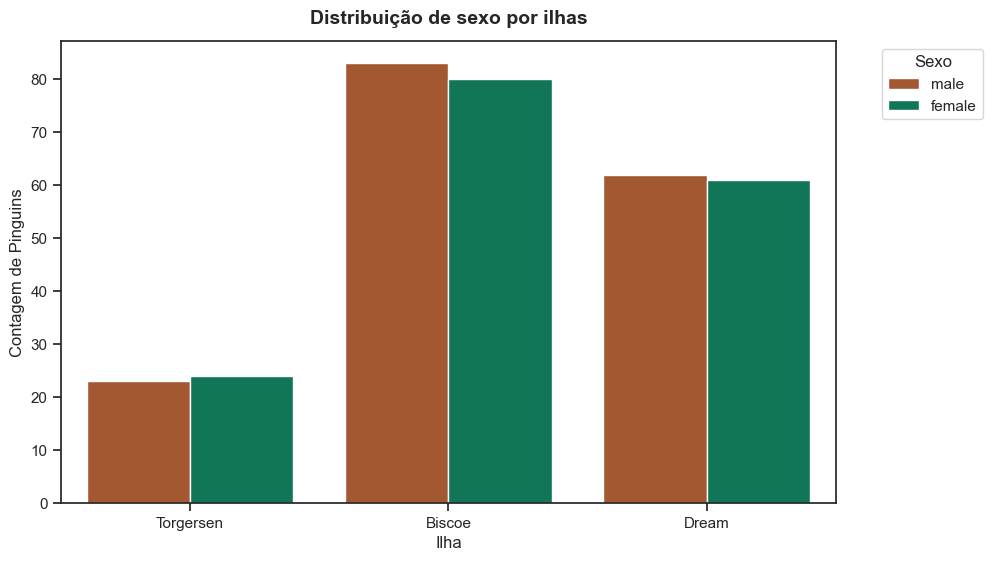

In [57]:
# Criar gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.countplot(
    x="island", 
    hue="sex", 
    data=df, 
    palette=["#b7521f","#00865f"], 
    dodge=True
)

# Adicionando título
plt.title("Distribuição de sexo por ilhas", fontweight='bold', fontsize=14, y=1.02)
plt.xlabel("Ilha", fontsize=12)
plt.ylabel("Contagem de Pinguins", fontsize=12)

# Legenda
plt.legend(title="Sexo", bbox_to_anchor=(1.05,1), loc='upper left')

plt.show()

**Insights:** "O gráfico revela que a distribuição de sexos entre as ilhas Torgersen, Biscoe, Dream varia. Em Biscoe, há uma predominância de feminino, enquanto em Torgersen e Dream, os números estão mais equilibrados. Esses padrões podem estar associados a fatores ambientais ou ecológicos específicos de cada ilha, como disponibilidade de recursos, locais de reprodução ou sobrevivência diferencial.

# 4. Observações

- Não são tiradas conclusões a respeito dos dados e/ou visualizações. Para tal, seria necessário o auxílio de algum especialista no assunto.